In [1]:
from pathlib import Path
from zipfile import ZipFile

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
import matplotlib.pyplot as plt

# Data
This data was obtained from https://www.kaggle.com/c/malware-detection<br>
To evaluate this workbook you will need access to the data. Login or create an account with kaggle (or login via google) to access link. Accept the terms and conditions of the competion and click the `Download All` button in the `Data` tab.<br>
Place the zip file in the root folder of this repository. (The next cell will extract it into the correct location)
<br><br>
__Data Description__ _from Kaggle_<br>
The raw data here was obtained from the malware security partner of Meraz'18 - Annual Techno Cultural festival of IIT Bhilai, the said raw data constituted malware and legitimate files.

Malware represents software which is specifically designed to disrupt, damage, or gain authorised access to a computer system. Legitimate files are software that don't behave like malware and are useful and harmless to the users.

Statistical analysis was done on these files which mainly constituted the extraction of PE information and calculation of entropy of different sections of these files.

More data might be made public as the competition progresses to incorporate newly discovered zero day viruses to check the robustness of your algorithm. Doing this will also help you get an experience of the pressure under which these anti-malware software giants like Max Secure Software work to provide uninterrupted protection.

In [2]:
# Check if the zip folder has been extracted and extract it if not
data_dir = Path("../data")
if not data_dir.exists():
    data_dir.mkdir()
    z_path = Path("../malware-detection.zip")
    ZipFile(file=z_path).extractall(path=data_dir, )

In [3]:
# This helps the dataframe load faster
dtypes = {
    'ID': int,
    'md5': str,
    'Machine': str,
    'SizeOfOptionalHeader': int,
    'Characteristics': int,
    'MajorLinkerVersion': float,
    'MinorLinkerVersion': int,
    'SizeOfCode': int,
    'SizeOfInitializedData': int,
    'SizeOfUninitializedData': int,
    'AddressOfEntryPoint': int,
    'BaseOfCode': int,
    'BaseOfData': int,
    'ImageBase': float,
    'SectionAlignment': int,
    'FileAlignment': int,
    'MajorOperatingSystemVersion': int,
    'MinorOperatingSystemVersion': int,
    'MajorImageVersion': int,
    'MinorImageVersion': int,
    'MajorSubsystemVersion': int,
    'MinorSubsystemVersion': int,
    'SizeOfImage': int,
    'SizeOfHeaders': int,
    'CheckSum': int,
    'Subsystem': int,
    'DllCharacteristics': int,
    'SizeOfStackReserve': int,
    'SizeOfStackCommit': int,
    'SizeOfHeapReserve': int,
    'SizeOfHeapCommit': int,
    'LoaderFlags': int,
    'NumberOfRvaAndSizes': int,
    'SectionsNb': int,
    'SectionsMeanEntropy': float,
    'SectionsMinEntropy': float,
    'SectionsMaxEntropy': float,
    'SectionsMeanRawsize': float,
    'SectionsMinRawsize': int,
    'SectionMaxRawsize': int,
    'SectionsMeanVirtualsize': float,
    'SectionsMinVirtualsize': float,
    'SectionMaxVirtualsize': int,
    'ImportsNbDLL': int,
    'ImportsNb': int,
    'ImportsNbOrdinal': int,
    'ExportNb': int,
    'ResourcesNb': int,
    'ResourcesMeanEntropy': float,
    'ResourcesMinEntropy': float,
    'ResourcesMaxEntropy': float,
    'ResourcesMeanSize': float,
    'ResourcesMinSize': float,
    'ResourcesMaxSize': int,
    'LoadConfigurationSize': int,
    'VersionInformationSize': int,
    'legitimate': int,
    'Unnamed: 57': float
}

In [4]:
kdata = pd.read_csv(data_dir / "Kaggle-data.csv", dtype=dtypes)

In [5]:
# Extract the input data and output data from the dataset
X = kdata.iloc[:, 3:-2]
Y = kdata["legitimate"]

In [6]:
# Replace any `N/A`s with `0`. This prevents errors in training
X.fillna(0, inplace=True)

In [7]:
X # Preview of the training data

,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,224,8450,8.0,0,16896,8192,0,16947,4096,24576,...,31,1,3.492126,3.492126,3.492126,864.000000,864.0,864,72,0
1,224,258,9.0,0,84480,25600,0,10973,4096,90112,...,2,1,3.486827,3.486827,3.486827,892.000000,892.0,892,72,0
2,224,8450,8.0,0,4608,3584,0,6452,4096,12288,...,3,1,3.517270,3.517270,3.517270,952.000000,952.0,952,72,0
3,224,8450,10.0,0,108544,15872,0,105021,4096,114688,...,105,2,3.270559,3.034188,3.506931,1032.000000,972.0,1092,72,0
4,224,8226,48.0,0,513024,2048,0,520922,8192,524288,...,0,1,3.420977,3.420977,3.420977,954.000000,954.0,954,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216347,224,258,11.0,0,205824,223744,0,123291,4096,212992,...,0,7,4.122736,1.370260,7.677091,14900.714286,16.0,81654,72,0
216348,224,33167,2.0,25,37888,185344,0,40000,4096,45056,...,0,26,3.377663,2.031619,5.050074,6905.846154,44.0,67624,0,15
216349,224,258,10.0,0,118272,380416,0,59610,4096,122880,...,0,22,6.825406,2.617026,7.990487,14981.909091,48.0,22648,72,14
216350,224,33166,2.0,25,49152,16896,0,51216,4096,53248,...,0,10,3.421627,2.060964,4.739744,601.600000,16.0,2216,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Validation of Random Forest Accuracy

In [9]:
model = RFC(verbose=1, n_jobs=4, random_state=20)

In [10]:
model.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.3s finished


RandomForestClassifier(n_jobs=4, random_state=20, verbose=1)

### Validation
Testing out the model on unseen data

In [11]:
model.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9889771278905276

### Feature Importance
This plot shows the top 10 most important features that the model used to determine legitimacy

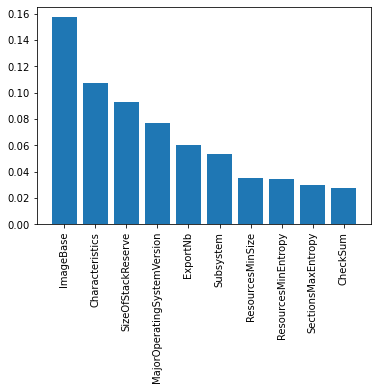

In [12]:
feature_importances = sorted(
    zip(X.columns,model.feature_importances_),
    key=lambda x:x[1],
    reverse = True
)
label, score = zip(*feature_importances[:10])

plt.bar(label, score)
plt.xticks(rotation=90, size=10)
plt.show()

In [13]:
y_predict = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [14]:
print(f"True Positives: {sum(y_predict*y_test)} (correctly labeled safe)")
print(f"True Negatives: {sum((y_predict==0)*(y_test==0))} (correctly labeled unsafe)")
print(f"False Positives: {sum(y_predict*(y_test==0))} (incorrectly labeled safe)")
print(f"False Negatives: {sum((y_predict==0)*y_test)} (incorrectly labeled unsafe)")

True Positives: 24489 (correctly labeled safe)
True Negatives: 46121 (correctly labeled unsafe)
False Positives: 353 (incorrectly labeled safe)
False Negatives: 434 (incorrectly labeled unsafe)


## Evaluation of Alternative Models

In [15]:
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.neural_network import MLPClassifier

In [16]:
models = []
for model in [
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    MLPClassifier
]:
    m = model(random_state=20)
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    models.append([model.__name__, score])

In [17]:
for m,s in sorted(models,key=lambda x:x[1], reverse = True):
    print(f"{m}: {round(s,4)}")

ExtraTreesClassifier: 0.9891
RandomForestClassifier: 0.989
BaggingClassifier: 0.9863
GradientBoostingClassifier: 0.9754
AdaBoostClassifier: 0.9664
MLPClassifier: 0.9039
